In [16]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os
import matplotlib.pyplot as plt
import cv2
import sys
import os

In [17]:
# 폴더에서 이미지 불러오기
# IMG_DIR = 'D:/Ai/project/emotion_detection_dataset/fer2013/train/Angry/' #폴더 위치
# cnt = 1
# plt.figure(figsize = (30,30))
# for dirname, _, filenames in os.walk(IMG_DIR):
#     for filename in filenames:
#         #print(os.path.join(dirname, filename))
#         if cnt >25:
#             continue
#         plt.subplot(5,5,cnt)
#         imgfile = dirname+'/'+filename
#         img = plt.imread(imgfile)
#         plt.imshow(img,cmap = 'bone')
#         plt.grid(False)
#         cnt += 1

In [18]:
dir = "D:/Ai/dataset"

In [19]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
train_gen = ImageDataGenerator(rescale= 1/255., #0~1사이의 값으로 정규화                                                                                                                   
                               #rotation_range=0.2, #random
                               #width_shift_range=0.2, #좌우 이동
                               #height_shift_range=0.2, #상하 이동
                               #zoom_range = 0.2, 
                               horizontal_flip=True,
                               validation_split = 0.02) #2%

test_gen = ImageDataGenerator(rescale= 1/255.,
                              validation_split = 0.2)

In [21]:
train_data = train_gen.flow_from_directory(dir,
                                           target_size = (180,180),
                                           class_mode = "categorical",
                                           seed = 42,
                                           subset = "training"
                                           )

test_data = test_gen.flow_from_directory(dir,
                                         target_size = (180,180),
                                         class_mode = "categorical",
                                         seed = 42,
                                         subset = "validation"
                                         )

Found 9461 images belonging to 3 classes.
Found 1928 images belonging to 3 classes.


In [22]:
labels = list(train_data.class_indices.keys())

labels

['incorrect_mask', 'with_mask', 'without_mask']

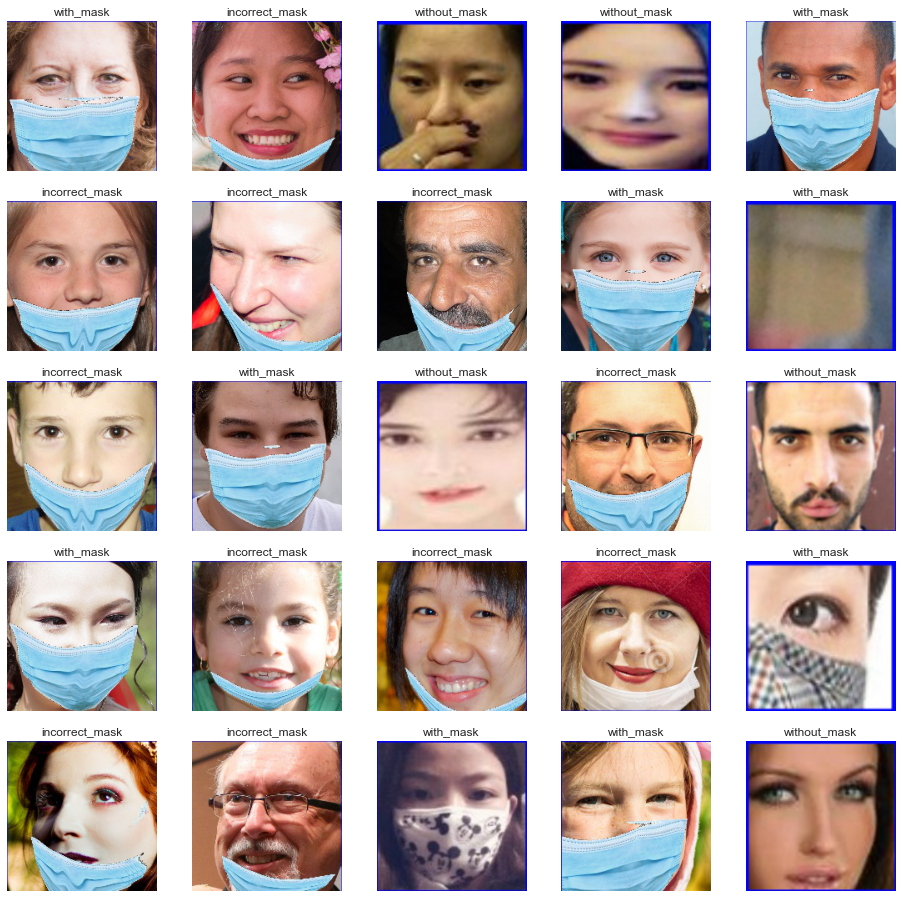

In [23]:
plt.figure(figsize = (16,16))

for i in range(25):
  image,label = train_data.next()

  plt.subplot(5,5,i+1)
  plt.imshow(image[i])
  plt.title(labels[tf.argmax(label[i])])
  plt.axis("off")

In [24]:
# Building a CNN model 
import tensorflow as tf
from tensorflow.keras import layers
model  = tf.keras.Sequential([
                              
                              layers.Conv2D(filters= 64, kernel_size= 2, activation="relu", input_shape=(180,180,3)),
                              layers.MaxPooling2D(pool_size= 2),

                              layers.Conv2D(filters = 64, kernel_size= 2, activation= "relu"),
                              layers.MaxPooling2D(pool_size= 2),

                              layers.Conv2D(filters = 64, kernel_size= 2, activation= "relu"),
                              layers.MaxPooling2D(pool_size= 2),

                              layers.Flatten(),

                              layers.Dense(128, activation="relu"),
                              layers.Dropout(0.5),

                              layers.Dense(3, activation= "softmax")
])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 179, 179, 64)      832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 89, 89, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 88, 88, 64)        16448     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 44, 44, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 43, 43, 64)        16448     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 21, 21, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28224)            

In [26]:
# compiling the model

model.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [27]:
# fitting data to the model

hist = model.fit(train_data,
          epochs = 10,
          steps_per_epoch = len(train_data),
          validation_data = test_data,
          validation_steps = len(test_data)
          )

Epoch 1/10
296/296 [==============================] - 107s 361ms/step - loss: 0.3298 - accuracy: 0.8813 - val_loss: 0.2418 - val_accuracy: 0.9139
Epoch 2/10
296/296 [==============================] - 101s 341ms/step - loss: 0.2296 - accuracy: 0.9147 - val_loss: 0.2348 - val_accuracy: 0.9196
Epoch 3/10
296/296 [==============================] - 101s 342ms/step - loss: 0.2097 - accuracy: 0.9214 - val_loss: 0.2017 - val_accuracy: 0.9295
Epoch 4/10
296/296 [==============================] - 102s 345ms/step - loss: 0.1880 - accuracy: 0.9245 - val_loss: 0.1896 - val_accuracy: 0.9170
Epoch 5/10
296/296 [==============================] - 101s 342ms/step - loss: 0.1722 - accuracy: 0.9330 - val_loss: 0.1803 - val_accuracy: 0.9310
Epoch 6/10
296/296 [==============================] - 102s 345ms/step - loss: 0.1558 - accuracy: 0.9347 - val_loss: 0.1604 - val_accuracy: 0.9295
Epoch 7/10
296/296 [==============================] - 102s 346ms/step - loss: 0.1476 - accuracy: 0.9396 - val_loss: 0.1308 -

In [28]:
model_evaluation = model.evaluate(test_data)
print(f"Model Accuracy: {model_evaluation[1] * 100 : 0.2f} %")

61/61 [==============================] - 5s 76ms/step - loss: 0.1140 - accuracy: 0.9476
Model Accuracy:  94.76 %


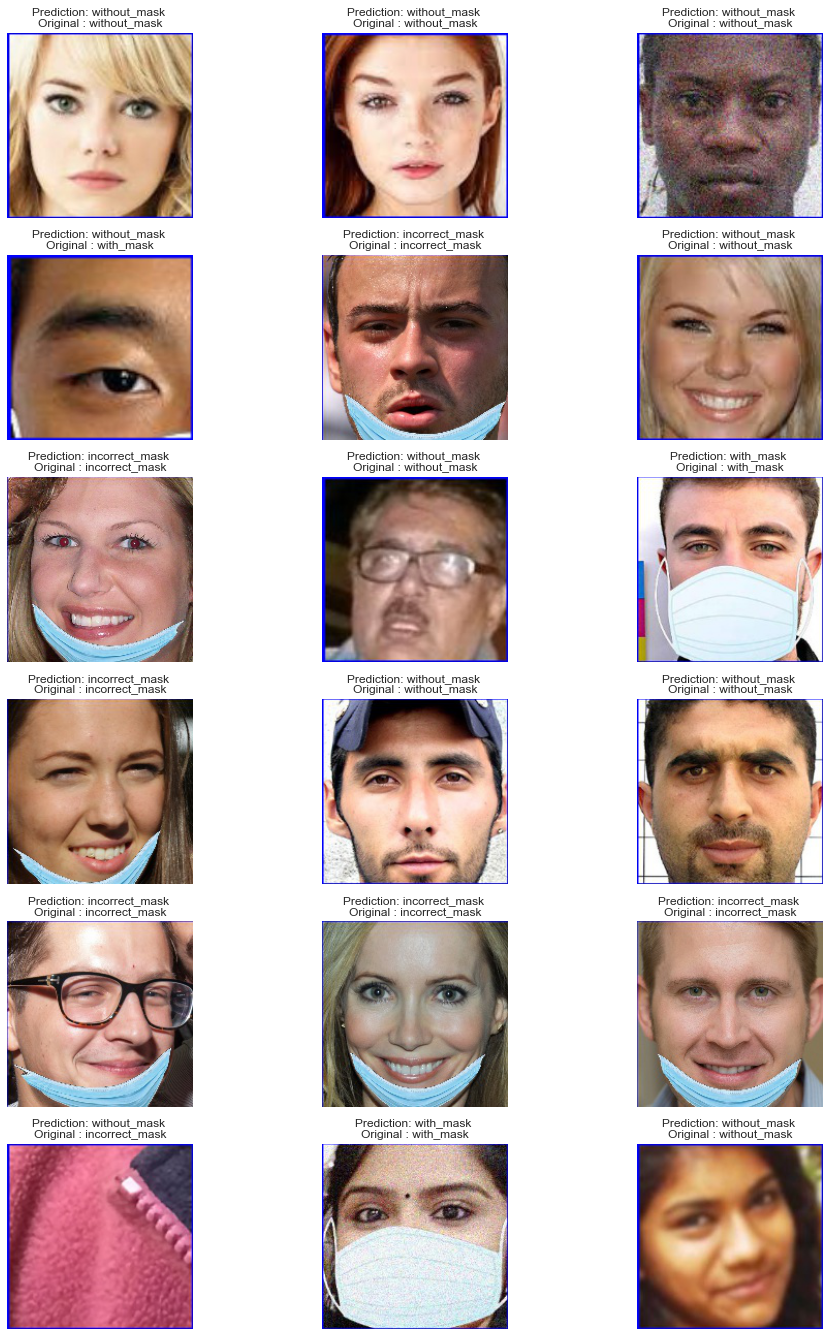

In [29]:
# visualizing the test data

import matplotlib.pyplot as plt
import tensorflow as tf

plt.figure(figsize=(16,16))

for i in range(18):
    image, label = test_data.next()

    model_pred = model.predict(image)

    plt.subplot(6,3,i+1)
    plt.imshow(image[i])
    plt.title(f"Prediction: {labels[tf.argmax(model_pred[i])]} \nOriginal : {labels[tf.argmax(label[i])]}")
    plt.subplots_adjust(top= 1.25)
    plt.axis("off")

In [2]:
model.summary()

NameError: name 'model' is not defined

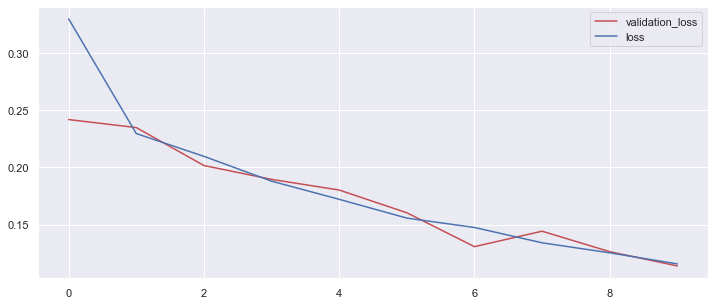

In [30]:
vloss = hist.history['val_loss'] # 테스트셋 loss.
loss = hist.history['loss'] # 학습셋.

plt.figure(figsize=(12,5))
epoch = np.arange(len(loss))
plt.plot(epoch, vloss, 'r', label='validation_loss')
plt.plot(epoch, loss, 'b', label='loss') # 학습셋.
plt.legend(loc='best')
plt.show()

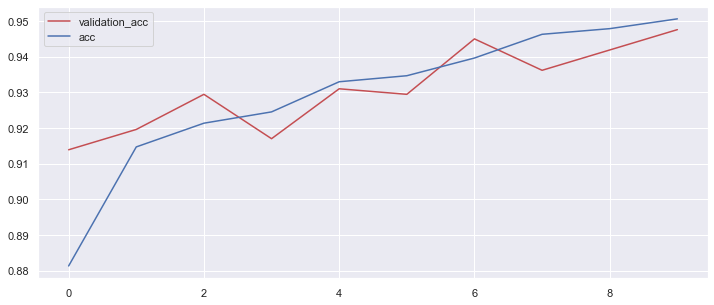

In [33]:
vacc = hist.history['val_accuracy'] # 테스트셋 loss.
acc = hist.history['accuracy'] # 학습셋.

plt.figure(figsize=(12,5))
epoch = np.arange(len(acc))
plt.plot(epoch, vacc, 'r', label='validation_acc')
plt.plot(epoch, acc, 'b', label='acc') # 학습셋.
plt.legend(loc='best')
plt.show()